In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
from random import randint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.callbacks import EarlyStopping
from keras import initializers
from matplotlib import pyplot
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

bitcoin_data = pd.read_csv('cryptocurrencypricehistory/bitcoin_dataset.csv', header = 0, parse_dates=['Date'])
bitcoin_data['Year'] = bitcoin_data['Date'].apply(lambda x: x.year)
bitcoin_data['Month'] = bitcoin_data['Date'].apply(lambda x: x.month)
bitcoin_data = bitcoin_data.loc[bitcoin_data['Date'] > datetime(2016,1,1)]
bitcoin_data.head(3)
bitcoin_data = bitcoin_data.set_index('Date')

/Users/samuel/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [3]:
df_train = bitcoin_data[0:700]
df_test = bitcoin_data[700:780]

In [4]:
scaler = MinMaxScaler()


training_set = df_train.values
training_set = scaler.fit_transform(training_set)
X_train = np.reshape(training_set, (len(training_set),1, df_train.shape[1]))
Y_train = training_set[:,0]


test_set = df_test.values
test_set = scaler.fit_transform(test_set)
X_test = np.reshape(test_set, (len(test_set),1, df_train.shape[1]))
Y_test = test_set[:,0]


In [5]:
Y_train.shape

(700,)

In [6]:
X_train.shape

(700, 1, 25)

In [7]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(256))
model.add(Dense(1))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 256)            288768    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 814,337
Trainable params: 814,337
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=200, batch_size=16, shuffle=False,
                    validation_data=(X_test, Y_test))

Train on 700 samples, validate on 80 samples
Epoch 1/200
700/700 [==============================] - 2s 2ms/step - loss: 0.0019 - val_loss: 0.0395
Epoch 2/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0119 - val_loss: 0.0693
Epoch 3/200
700/700 [==============================] - 1s 2ms/step - loss: 0.0037 - val_loss: 0.1187
Epoch 4/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0101 - val_loss: 0.0777
Epoch 5/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0032 - val_loss: 0.0536
Epoch 6/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0054 - val_loss: 0.1060
Epoch 7/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0078 - val_loss: 0.0432
Epoch 8/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0040 - val_loss: 0.1064
Epoch 9/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0066 - val_loss: 0.0436
Epoch 10/200
700/700 [========================

700/700 [==============================] - 1s 1ms/step - loss: 1.2162e-04 - val_loss: 0.0568
Epoch 80/200
700/700 [==============================] - 1s 1ms/step - loss: 1.2317e-04 - val_loss: 0.0556
Epoch 81/200
700/700 [==============================] - 1s 1ms/step - loss: 1.2423e-04 - val_loss: 0.0544
Epoch 82/200
700/700 [==============================] - 1s 1ms/step - loss: 1.2342e-04 - val_loss: 0.0534
Epoch 83/200
700/700 [==============================] - 1s 1ms/step - loss: 1.2166e-04 - val_loss: 0.0526
Epoch 84/200
700/700 [==============================] - 1s 1ms/step - loss: 1.1583e-04 - val_loss: 0.0519
Epoch 85/200
700/700 [==============================] - 1s 1ms/step - loss: 1.0589e-04 - val_loss: 0.0515
Epoch 86/200
700/700 [==============================] - 1s 1ms/step - loss: 9.3380e-05 - val_loss: 0.0511
Epoch 87/200
700/700 [==============================] - 1s 1ms/step - loss: 8.1911e-05 - val_loss: 0.0508
Epoch 88/200
700/700 [==============================] - 1s 

700/700 [==============================] - 1s 1ms/step - loss: 0.0023 - val_loss: 0.0562
Epoch 158/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0017 - val_loss: 0.0507
Epoch 159/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0023 - val_loss: 0.0557
Epoch 160/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0017 - val_loss: 0.0501
Epoch 161/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0023 - val_loss: 0.0550
Epoch 162/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0017 - val_loss: 0.0494
Epoch 163/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0022 - val_loss: 0.0543
Epoch 164/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0017 - val_loss: 0.0487
Epoch 165/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0022 - val_loss: 0.0538
Epoch 166/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0017 - v

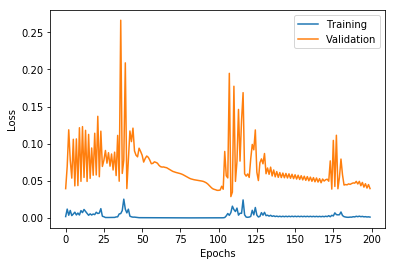

In [9]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

In [10]:
prediction = model.predict(X_test)

In [11]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))
Y_test = Y_test.reshape((len(Y_test), 1))

In [12]:
inv_prediction = np.concatenate((prediction, X_test[:, 1:]), axis=1)
inv_prediction = scaler.inverse_transform(inv_prediction)
inv_prediction = inv_prediction[:,0]

Y_test_inverse = np.concatenate((Y_test, X_test[:, 1:]), axis=1)
Y_test_inverse = scaler.inverse_transform(Y_test_inverse)
Y_test_inverse = Y_test_inverse[:,0]

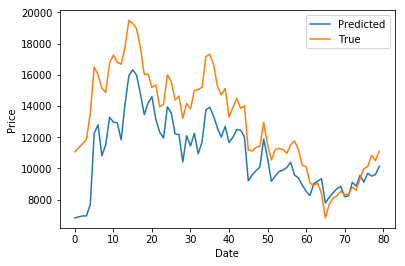

In [13]:
plt.figure()
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(inv_prediction)
plt.plot(Y_test_inverse)
plt.legend(['Predicted', 'True'])